# 1. Import libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import MDAnalysis as mda

import matplotlib as mpl
mpl.rcParams['font.size'] = 9
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9
mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['legend.frameon'] = False
mpl.font_manager.findSystemFonts(fontpaths="/home/marco/.local/share/fonts", fontext="ttf")
mpl.rcParams['font.family'] = 'Oswald'

palette = ['royalblue','limegreen', 'darkorange']

# 2. Basic analysis

## RMSD

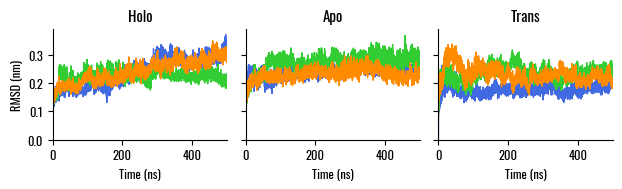

In [10]:
# Load data
time = np.loadtxt('../02-analysis/rmsd_apo_rep1.xvg', usecols=0,comments=['#','@'])
rmsds_holo = np.column_stack((np.loadtxt('../02-analysis/rmsd_holo_rep1.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../02-analysis/rmsd_holo_rep2.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../02-analysis/rmsd_holo_rep3.xvg', usecols=1,comments=['#','@'])))

rmsds_apo = np.column_stack((np.loadtxt('../02-analysis/rmsd_apo_rep1.xvg', usecols=1,comments=['#','@']),
                             np.loadtxt('../02-analysis/rmsd_apo_rep2.xvg', usecols=1,comments=['#','@']),
                             np.loadtxt('../02-analysis/rmsd_apo_rep3.xvg', usecols=1,comments=['#','@'])))

rmsds_tran = np.column_stack((np.loadtxt('../02-analysis/rmsd_trans_rep1.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../02-analysis/rmsd_trans_rep2.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../02-analysis/rmsd_trans_rep3.xvg', usecols=1,comments=['#','@'])))

fig,ax = plt.subplots(1,3,figsize=(16/2.54,5/2.54),sharey=True,sharex=True)
for i,r in enumerate([rmsds_holo,rmsds_apo,rmsds_tran]):
    ax[i].plot(time,r[:,0],color=palette[0],label='Rep 1')
    ax[i].plot(time,r[:,1],color=palette[1],label='Rep 2')
    ax[i].plot(time,r[:,2],color=palette[2],label='Rep 3')
    ax[i].set_xlabel('Time (ns)')
    ax[i].set_xlim(0,500)
    ax[i].set_ylim(bottom=0)

ax[0].set_ylabel('RMSD (nm)')
ax[0].set_title('Holo'); ax[1].set_title('Apo'); ax[2].set_title('Trans')
sns.despine()
fig.tight_layout()
fig.savefig('../05-Images/RMSD.png',dpi=600,facecolor='white')

## RMSF

In [14]:
def add_helices(ax,botlim=0,w=0.02):
    from matplotlib.patches import Rectangle
    ax.add_patch(Rectangle((3,botlim),36,w,  fill=True,lw=0,color='k'))
    ax.add_patch(Rectangle((42,botlim),30,w, fill=True,lw=0,color='k'))
    ax.add_patch(Rectangle((77,botlim),35,w, fill=True,lw=0,color='k'))
    ax.add_patch(Rectangle((124,botlim),30,w,fill=True,lw=0,color='k'))
    ax.add_patch(Rectangle((173,botlim),40,w,fill=True,lw=0,color='k'))
    ax.add_patch(Rectangle((218,botlim),36,w,fill=True,lw=0,color='k'))
    ax.add_patch(Rectangle((258,botlim),24,w,fill=True,lw=0,color='k'))
    ax.add_patch(Rectangle((283,botlim),18,w,fill=True,lw=0,color='k'))
    ax.text(20, botlim+w+0.005,"TM1",fontsize=9, ha='center')
    ax.text(57, botlim+w+0.005,"TM2",fontsize=9, ha='center')
    ax.text(95, botlim+w+0.005,"TM3",fontsize=9, ha='center')
    ax.text(139,botlim+w+0.005,"TM4",fontsize=9, ha='center')
    ax.text(193,botlim+w+0.005,"TM5",fontsize=9, ha='center')
    ax.text(236,botlim+w+0.005,"TM6",fontsize=9, ha='center')
    ax.text(270,botlim+w+0.005,"TM7",fontsize=9, ha='center')
    ax.text(292,botlim+w+0.005,"H8", fontsize=9, ha='center')

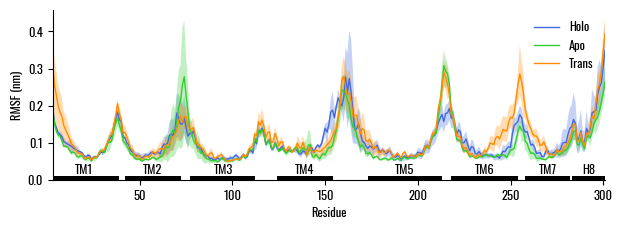

In [22]:
# load data
residues = np.loadtxt('../02-analysis/rmsf_apo_rep1.xvg', usecols=0,comments=['#','@'])

rmsfs_holo = np.column_stack((np.loadtxt('../02-analysis/rmsf_holo_rep1.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../02-analysis/rmsf_holo_rep2.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../02-analysis/rmsf_holo_rep3.xvg', usecols=1,comments=['#','@'])))

rmsfs_apo = np.column_stack((np.loadtxt('../02-analysis/rmsf_apo_rep1.xvg', usecols=1,comments=['#','@']),
                             np.loadtxt('../02-analysis/rmsf_apo_rep2.xvg', usecols=1,comments=['#','@']),
                             np.loadtxt('../02-analysis/rmsf_apo_rep3.xvg', usecols=1,comments=['#','@'])))

rmsfs_tran = np.column_stack((np.loadtxt('../02-analysis/rmsf_trans_rep1.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../02-analysis/rmsf_trans_rep2.xvg', usecols=1,comments=['#','@']),
                              np.loadtxt('../02-analysis/rmsf_trans_rep3.xvg', usecols=1,comments=['#','@'])))

fig,ax = plt.subplots(1,1,figsize=(16/2.54,6/2.54))
ax.plot(residues,rmsfs_holo.mean(axis=1),color=palette[0],label='Holo')
ax.plot(residues,rmsfs_apo.mean(axis=1),color=palette[1],label='Apo')
ax.plot(residues,rmsfs_tran.mean(axis=1),color=palette[2],label='Trans')

ax.fill_between(residues,rmsfs_holo.min(axis=1),
                rmsfs_holo.mean(axis=1)+rmsfs_holo.std(axis=1),color=palette[0],alpha=0.3,edgecolor=None)
ax.fill_between(residues,rmsfs_apo.min(axis=1),
                rmsfs_apo.mean(axis=1)+rmsfs_apo.std(axis=1),color=palette[1],alpha=0.3,edgecolor=None)
ax.fill_between(residues,rmsfs_tran.min(axis=1),
                rmsfs_tran.mean(axis=1)+rmsfs_tran.std(axis=1),color=palette[2],alpha=0.3,edgecolor=None)

add_helices(ax,w=0.01)

ax.set_xlabel('Residue')
ax.set_ylabel('RMSF (nm)')
ax.set_xlim(residues[0],residues[-1])
ax.set_ylim(bottom=0)
ax.legend()
sns.despine()
fig.tight_layout()
fig.savefig('../05-Images/RMSF.png',dpi=600,facecolor='white')

# Volume

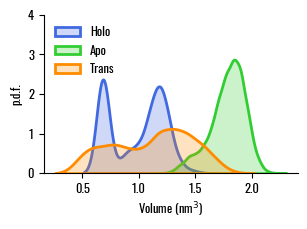

In [43]:
# Load volume data
vol_holo = np.loadtxt('../02-analysis/volume_holo.dat', usecols=1,skiprows=1)/1000
vol_apo = np.loadtxt('../02-analysis/volume_apo.dat', usecols=1,skiprows=1)/1000
vol_tran = np.loadtxt('../02-analysis/volume_trans.dat', usecols=1,skiprows=1)/1000

fig,ax = plt.subplots(1,1,figsize=(8/2.54,6/2.54))
sns.kdeplot(vol_holo,ax=ax,color=palette[0],label='Holo',cut=0, fill=True)
sns.kdeplot(vol_apo,ax=ax,color=palette[1],label='Apo',cut=0, fill=True)
sns.kdeplot(vol_tran,ax=ax,color=palette[2],label='Trans',cut=0, fill=True)
ax.set_xlabel('Volume (nm$^3$)')
ax.set_ylabel('p.d.f.')
ax.set_ylim(0,4)
ax.legend(loc='upper left')
sns.despine()
fig.tight_layout()